In [6]:
import pandas as pd
x =pd.Series(dtype=float)
y= 0.3
for t in range(1,501):
    y=4*y*(1-y)
    x=x.append(pd.Series(y))
    
index= range(1,501)
x.index = index

C:\Users\guilh\AppData\Local\Temp\ipykernel_20692\3480425525.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=x.append(pd.Series(y))
C:\Users\guilh\AppData\Local\Temp\ipykernel_20692\3480425525.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=x.append(pd.Series(y))
C:\Users\guilh\AppData\Local\Temp\ipykernel_20692\3480425525.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=x.append(pd.Series(y))
C:\Users\guilh\AppData\Local\Temp\ipykernel_20692\3480425525.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=x.append(pd.Series(y))
C:\Users\guilh\AppData\Local\Temp\ipykernel_20692\3480425525.py:6: FutureWarning: The se

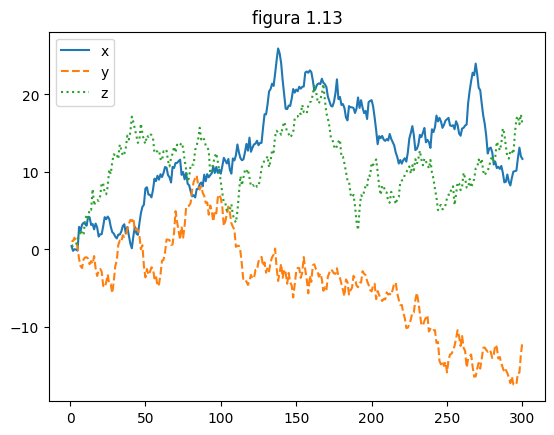

In [13]:
import numpy as np
import pandas as pd
from numpy.random import normal
import matplotlib.pyplot as plt
np.random.seed(1357)
a=normal(size=300)
b=normal(size=300)
c=normal(size=300)
x= np.cumsum(a); y = np.cumsum(b); z=np.cumsum(c)
xyz = pd.DataFrame({'x':x, 'y':y, 'z':z})
xyz.index = range(1,301)
xyz.plot(style=['-','--',':'])
plt.title('figura 1.13')
plt.show()


In [15]:
!pip install PythonTsa

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/440.7 kB ? eta -:--:--
    --------------------------------------- 10.2/440.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/440.7 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/440.7 kB 409.6 kB/s eta 0:00:01
   ------------- ------------------------ 153.6/440.7 kB 833.5 kB/s eta 0:00:01
   ----------------------------- ---------- 327.7/440.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 440.7/440.7 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#pandas numpy matplot
from PythonTsa.datadir import getdtapath

In [22]:
dtapath=getdtapath()
milk=pd.read_excel(dtapath + 'milk.xlsx', header = None)
type(milk)

pandas.core.frame.DataFrame

In [23]:
milk

,0,1,2,3,4,5,6,7,8,9
0,589,561,640,656,727,697,640,599,568.0,577.0
1,553,582,600,566,653,673,742,716,660.0,617.0
2,583,587,565,598,628,618,688,705,770.0,736.0
3,678,639,604,611,594,634,658,622,709.0,722.0
4,782,756,702,653,615,621,602,635,677.0,635.0
5,736,755,811,798,735,697,661,667,645.0,688.0
6,713,667,762,784,837,817,767,722,681.0,687.0
7,660,698,717,696,775,796,858,826,783.0,740.0
8,701,706,677,711,734,690,785,805,871.0,845.0
9,801,764,725,723,690,734,750,707,807.0,824.0


estamo pegando e "concatenando" as linhas em um grande coluna

In [29]:
mseries = pd.concat([milk.loc[0], milk.loc[1], milk.loc[2], milk.loc[3], milk.loc[4], milk.loc[5], milk.loc[6],
                     milk.loc[7], milk.loc[8], milk.loc[9], milk.loc[10], milk.loc[11], milk.loc[12], milk.loc[13],
                     milk.loc[14], milk.loc[15], milk.loc[16]], ignore_index = 'true')

In [30]:
type(mseries)

pandas.core.series.Series

In [34]:
mts = mseries.drop([168,169])
mts.head(15)

0     589.0
1     561.0
2     640.0
3     656.0
4     727.0
5     697.0
6     640.0
7     599.0
8     568.0
9     577.0
10    553.0
11    582.0
12    600.0
13    566.0
14    653.0
dtype: float64

In [35]:
timeindex = pd.date_range('1962-01', periods=168, freq='M')
mts.index=timeindex

In [36]:
mts

1962-01-31    589.0
1962-02-28    561.0
1962-03-31    640.0
1962-04-30    656.0
1962-05-31    727.0
              ...  
1975-08-31    858.0
1975-09-30    817.0
1975-10-31    827.0
1975-11-30    797.0
1975-12-31    843.0
Freq: M, Length: 168, dtype: float64

In [37]:
#agora pra plotar temos

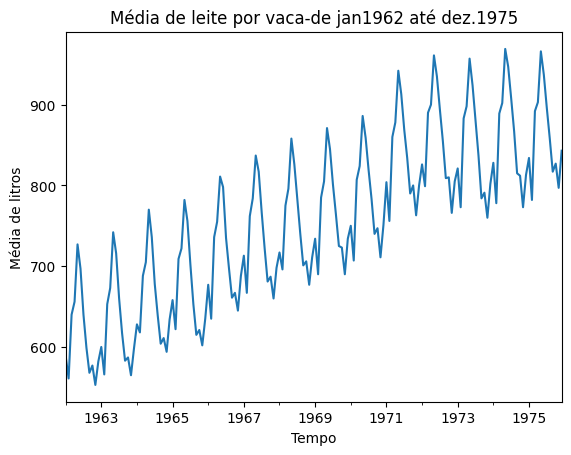

In [41]:
mts.plot()
plt.title('Média de leite por vaca-de jan1962 até dez.1975')
plt.xlabel('Tempo')
plt.ylabel('Média de litros')
plt.show()

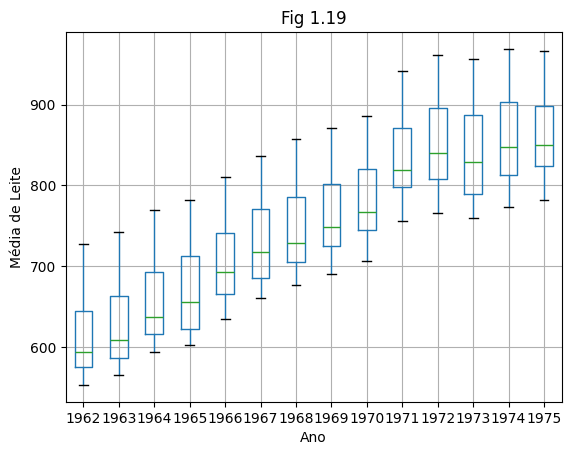

In [50]:
#vamo plotar o boxplot anual
my=np.array(mts).reshape(14,12)
myt=np.transpose(my)
year = [1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975]
myt = pd.DataFrame(myt, columns=year)
bp = myt.boxplot()
plt.xlabel('Ano')
plt.ylabel('Média de Leite')
plt.title('Fig 1.19')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

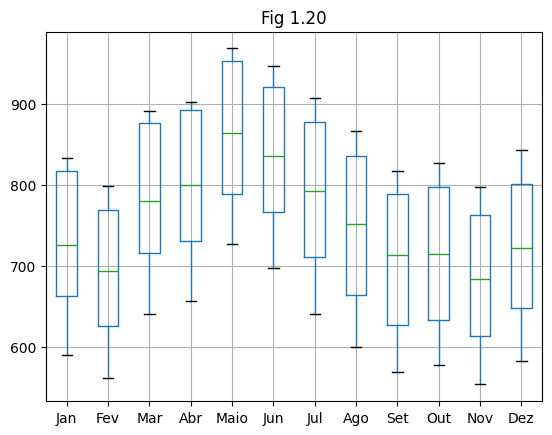

In [47]:
#Vamos fazer o mesmo método para os meses
month = ['Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
myd = pd.DataFrame(my, columns=month)
bpm=myd.boxplot()
plt.title('Fig 1.20')
plt.show

In [126]:
btc=pd.read_excel(dtapath + 'BitcoinPrice17-6-23-18-6-22.xlsx', header = 0)
type(btc)

pandas.core.frame.DataFrame

In [128]:
btc

,Time,ClosingP,OpenP,High,Low,Volume,Rate
0,42909,2674.9,2672.8,2725.30,2652.80,8.14K,0.0008
1,42910,2502.6,2674.9,2700.00,2454.10,16.77K,-0.0644
2,42911,2477.7,2502.6,2595.00,2369.10,18.13K,-0.0099
3,42912,2394.6,2480.0,2510.40,2258.70,36.37K,-0.0335
4,42913,2521.2,2393.5,2524.00,2208.10,33.49K,0.0529
...,...,...,...,...,...,...,...
360,43269,6709.2,6443.5,6826.79,6378.60,26.37K,0.0425
361,43270,6737.5,6711.6,6832.90,6666.20,17.38K,0.0042
362,43271,6760.4,6732.7,6818.20,6560.00,18.71K,0.0034
363,43272,6713.5,6760.0,6787.10,6680.10,10.65K,-0.0069


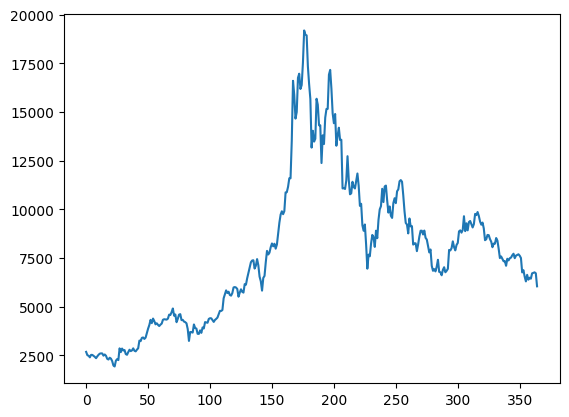

In [129]:
plt.plot(btc['ClosingP'])

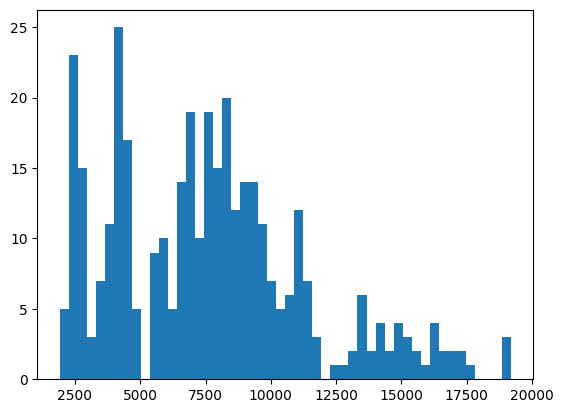

In [115]:
plt.hist(btc['ClosingP'], bins=50)
plt.show()

In [116]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

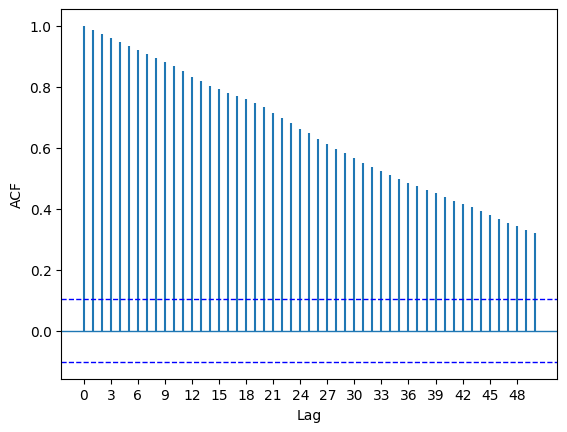

In [130]:
acf_pacf_fig(btc['ClosingP'], lag =50)

In [131]:
btc

,Time,ClosingP,OpenP,High,Low,Volume,Rate
0,42909,2674.9,2672.8,2725.30,2652.80,8.14K,0.0008
1,42910,2502.6,2674.9,2700.00,2454.10,16.77K,-0.0644
2,42911,2477.7,2502.6,2595.00,2369.10,18.13K,-0.0099
3,42912,2394.6,2480.0,2510.40,2258.70,36.37K,-0.0335
4,42913,2521.2,2393.5,2524.00,2208.10,33.49K,0.0529
...,...,...,...,...,...,...,...
360,43269,6709.2,6443.5,6826.79,6378.60,26.37K,0.0425
361,43270,6737.5,6711.6,6832.90,6666.20,17.38K,0.0042
362,43271,6760.4,6732.7,6818.20,6560.00,18.71K,0.0034
363,43272,6713.5,6760.0,6787.10,6680.10,10.65K,-0.0069


In [118]:
#pela função ele encontra autocorrelação nos lags,vamos terminar o exercicio com o laged} price do bitcoin

In [132]:
dat = pd.date_range('2017-06-23', periods=len(btc), freq='D')
btc.index=dat
price = btc['ClosingP']

<Axes: >

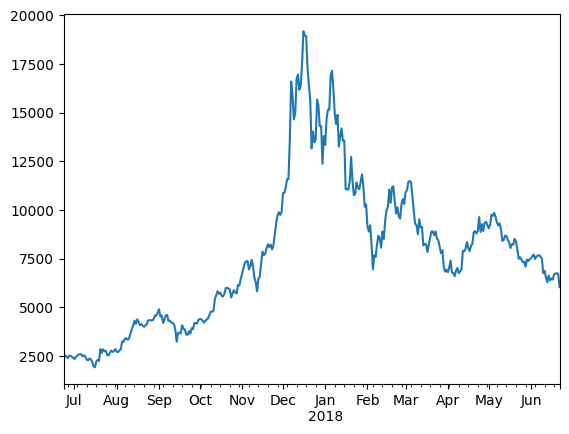

In [133]:
price.plot()

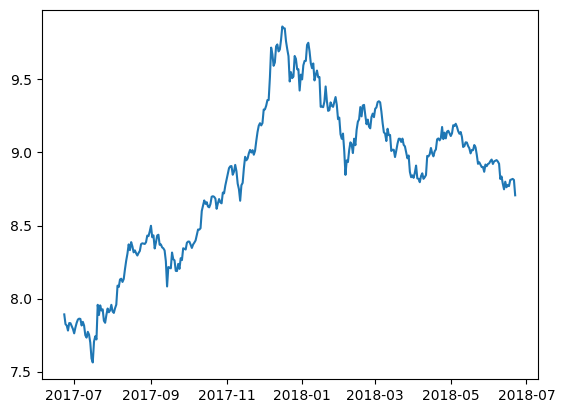

In [135]:
logp = np.log(price)
plt.plot(logp)

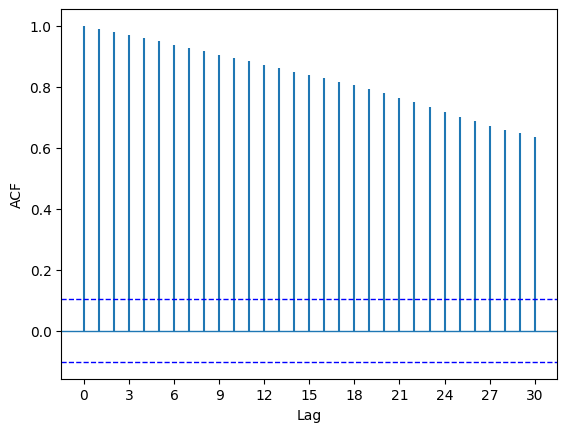

In [136]:
acf_pacf_fig(logp)

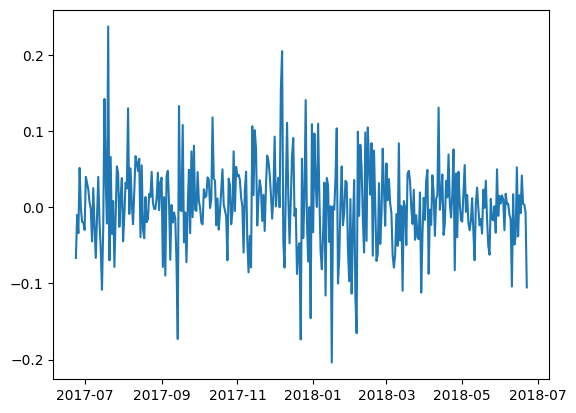

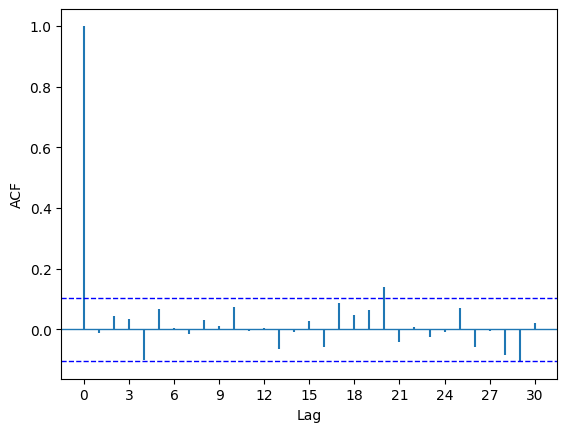

In [141]:
dlogp= logp.diff(1)
dlogp= dlogp.dropna()
plt.plot(dlogp)
plt.show()
acf_pacf_fig(dlogp)

# 1.5
simular ruido branco

<Axes: >

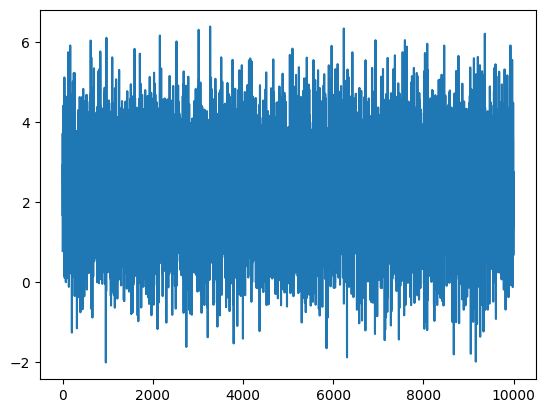

In [175]:
np.random.seed(135)
x = np.random.normal(2.3 ,1.2, size =10000)
xts = pd.Series(x)
xts.plot()

In [177]:
print(f'a média é {xts.mean()}')
print(f'a variancia é {xts.var()}')
print(f'o desvio é {xts.std()}')
#basicamente o exercicio é pra mostrar que vai convergindo quando n->infinito

a média é 2.29412689685029
a variancia é 1.4324427944141338
o desvio é 1.1968470221436547
